<a href="https://colab.research.google.com/github/adha20/titanic-survival-prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎯 Titanic Survival Prediction: Machine Learning Project

Proyek ini bertujuan untuk memprediksi siapa yang kemungkinan besar selamat dari tragedi tenggelamnya kapal Titanic berdasarkan data penumpang seperti jenis kelamin, usia, kelas penumpang, jumlah keluarga di kapal, dan fitur lainnya.

Dataset yang digunakan merupakan dataset populer dari kompetisi **Kaggle: Titanic - Machine Learning from Disaster**, yang sering dijadikan benchmark awal untuk mempelajari konsep dasar **data preprocessing**, **feature engineering**, serta **pemodelan machine learning**.

## 🚀 Langkah-langkah Utama

### 1. Eksplorasi dan Analisis Data (EDA)
Memahami distribusi data dan pola keterkaitan antar fitur.

### 2. Data Cleaning & Preprocessing
Mengatasi nilai yang hilang, encoding data kategorikal, dan scaling.

### 3. Feature Engineering
Membuat fitur baru yang lebih representatif dari fitur asli

### 4. Modeling
Membangun model klasifikasi menggunakan algoritma Random Forest

### 5. Evaluasi Model
Menggunakan metrik seperti akurasi untuk mengukur performa model.

---

## ✨ Pembelajaran Feature Engineering

Selama proses ini, saya mempelajari dan menerapkan konsep **feature engineering**, yaitu proses merekayasa fitur-fitur baru dari data mentah untuk meningkatkan kinerja model.

Sebagai bagian dari pembelajaran dan evaluasi, saya membandingkan dua pendekatan pemodelan:

### ✅ Dengan Feature Engineering
Fitur-fitur seperti:
- **Jabatan dalam nama penumpang (`Title`)**
- **Jumlah anggota keluarga (`FamilySize`)**
- **Jumlah tiket (`Ticket Frequency`)**
- **Status (`Is Married`)**

dikembangkan untuk memberikan informasi tambahan kepada model.

### 🚫 Tanpa Feature Engineering
Model dibangun hanya berdasarkan data asli (**raw data**) tanpa pembuatan fitur tambahan. Hanya dilakukan pembersihan dasar.

---

## 📊 Hasil Evaluasi

Pendekatan **dengan feature engineering** menunjukkan hasil akurasi yang lebih tinggi dibandingkan pendekatan **tanpa feature engineering**. Hal ini menunjukkan bahwa **rekayasa fitur memiliki peran penting dalam meningkatkan performa model machine learning**.




In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

#Read data

In [117]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

df_train = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_train.csv')
df_test = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_test.csv')
df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'
dfs = [df_train, df_test]

df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [118]:
df_train.shape

(891, 12)

In [119]:
df_train.shape

(891, 12)

In [120]:
df_all.shape

(1309, 12)

In [121]:
df_all.info(memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)

Terdapat beberapa data yang kosong di kolom  'Embarked, 'Age', dan 'Cabin'

In [122]:
df_all.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


### Penjelasan Fitur Dataset Titanic
---
* **`PassengerId`**: ID unik untuk setiap baris (penumpang). **Tidak ada pengaruh terhadap target yang dicari**.
* **`Survived`**: **Target yang akan diprediksi**.
    * `0` = Tidak Selamat (Not Survived)
    * `1` = Selamat (Survived)
* **`Pclass` (Passenger Class)**: Kategori level sosial ekonomi penumpang.
    * `1` = Upper Class
    * `2` = Middle Class
    * `3` = Lower Class
* **`Name`**: Nama lengkap penumpang.
* **`Sex`**: Jenis kelamin penumpang.
* **`Age`**: Usia penumpang.
* **`SibSp`**: Jumlah saudara kandung atau pasangan dari penumpang.
* **`Parch`**: Jumlah orang tua dan anak dari penumpang.
* **`Ticket`**: Nomor tiket penumpang.
* **`Fare`**: Tarif yang dikenakan kepada penumpang.
* **`Cabin`**: Nomor kabin penumpang.
* **`Embarked`**: Pelabuhan pemberangkatan.
    * `C` = Cherbourg
    * `Q` = Queenstown
    * `S` = Southampton


##Cek Korelasi

In [123]:
df_train.select_dtypes(include=['number']).corr().abs()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.005007,0.035144,0.036847,0.057527,0.001652,0.012658
Survived,0.005007,1.000000,0.338481,0.077221,0.035322,0.081629,0.257307
Pclass,0.035144,0.338481,1.000000,0.369226,0.083081,0.018443,0.549500
Age,0.036847,0.077221,0.369226,1.000000,0.308247,0.189119,0.096067
SibSp,0.057527,0.035322,0.083081,0.308247,1.000000,0.414838,0.159651
Parch,0.001652,0.081629,0.018443,0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,0.549500,0.096067,0.159651,0.216225,1.000000


<Axes: >

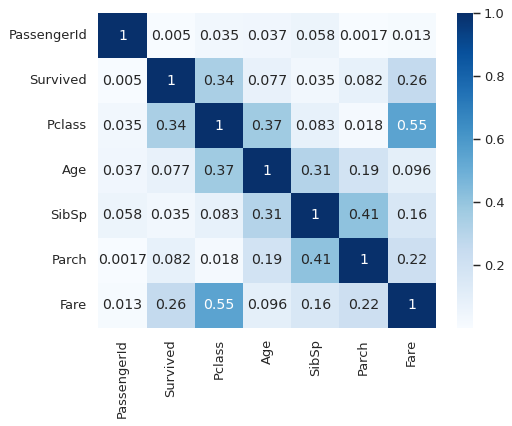

In [124]:
sns.heatmap(abs(df_train.select_dtypes(include=['number']).corr()), annot=True, cmap='Blues')

Pada data ini dapat dilihat bahwa target variable Survived sangat besar korelasinya dengan Pclass dan Fare. Sedangkan Age sangat berkaitan dengan Pclass, Sibling Spouse (SibSp), Parent Children (Parch).

Dapat diasumsikan bahwa kebanyakan orang yang selamat adalah orang dengan PClass atas dan Tuanya umur seseorang dapat dikatakan dia akan membawa saudara/orang tua/anak/pasangan.

Dan Fare (harga) tentu saja berkaitan dengan Pclass (kelas penumpang) seorang penumpang.

##Cek Missing Value


In [125]:
def display_missing(df):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')


In [126]:
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




##Menangani Missing Value

Untuk mengisi nilai yang hilang pada fitur Age, pendekatan yang digunakan adalah berdasarkan asumsi bahwa umur penumpang memiliki keterkaitan dengan kelas penumpang (Pclass) dan jenis kelamin (Sex). Oleh karena itu, dilakukan proses pengelompokan (grouping) berdasarkan kedua fitur tersebut, lalu nilai median dari umur dalam setiap kelompok digunakan untuk menggantikan nilai yang hilang.

In [127]:
age_by_pclass_sex= df_all.groupby(['Sex', 'Pclass'])['Age'].median()

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))

print('Median age of all passanger: {}'.format(df_all['Age'].median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passanger: 28.0


In [128]:
#Filling the missing value in Age with the Medians of Sex and Pclasss groups
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

Untuk fitur Embarked, ditemukan bahwa mayoritas penumpang Titanic berangkat dari pelabuhan Southampton (kode 'S'). Oleh karena itu, nilai yang hilang pada kolom ini diisi dengan nilai 'S'. Pendekatan ini dinilai lebih tepat dibandingkan membiarkan nilai tersebut kosong, karena tetap mempertahankan konsistensi data tanpa memberikan bias yang signifikan..

In [129]:
df_all['Embarked'] = df_all['Embarked'].fillna('S')

Fitur Fare (tarif) diketahui memiliki hubungan erat dengan beberapa variabel, seperti kelas penumpang (Pclass), jumlah orang tua/anak (Parch), serta jumlah saudara/kandung atau pasangan (SibSp). Oleh karena itu, untuk mengisi nilai yang hilang pada kolom ini, dilakukan pengelompokan berdasarkan kombinasi fitur-fitur tersebut. Kemudian, nilai median Fare dari masing-masing kelompok digunakan untuk mengisi nilai yang hilang.

In [130]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

##Analisis Pengaruh Fitur Kategorikal terhadap Tingkat Keselamatan Penumpang Titanic

/tmp/ipython-input-131-290101427.py:18: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


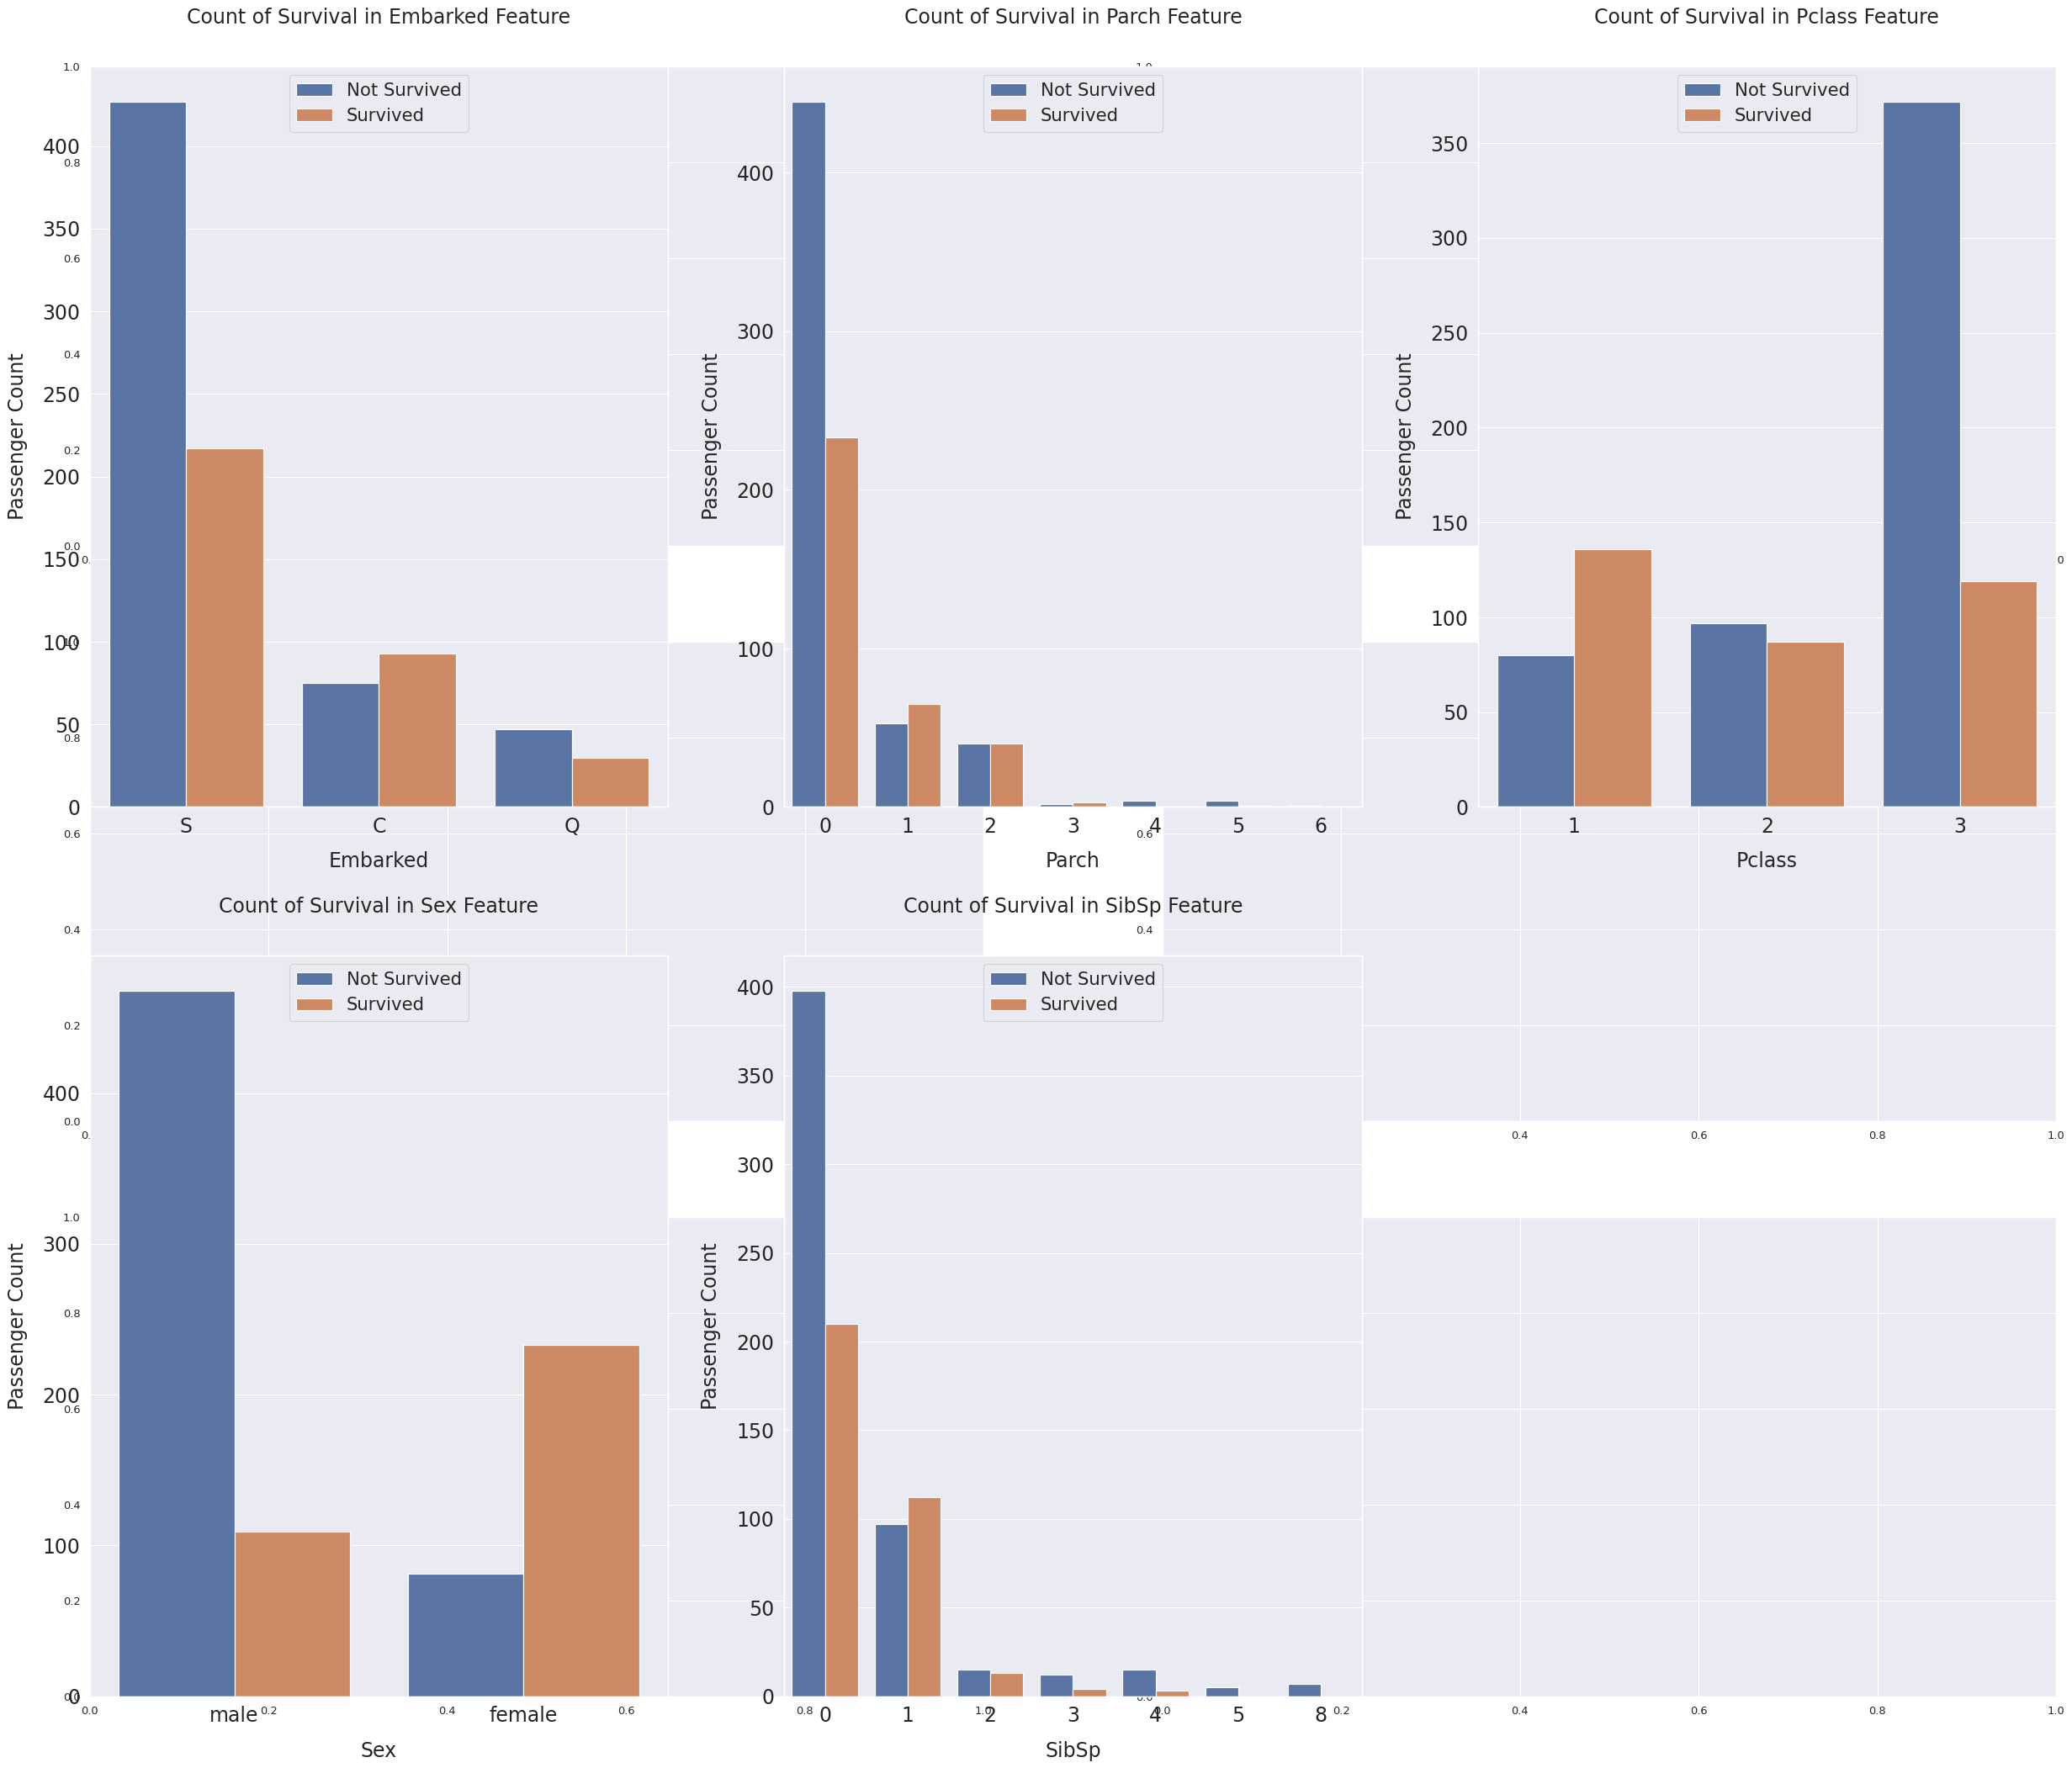

In [131]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='Survived', data=df_train)

    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)

    plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.tight_layout()
plt.show()

Dari plot yang dihasikan kita dapat melihat, ternyata penumpang yang berangkat dari Cherbourg lebih banyak yang selamat, sedangkan penumpang dari Southampton, hanya setengahnya yang selamat.

Untuk orang yang membawa hanya 1 Parent/Children, lebih banyak yang selamat.

Untuk orang dengan Kelas Penumpang 1, kemungkinan selamatnya jauh lebih tinggi. Dan penumpang dengan Kelas Penumpang 3 hanya sedikit yang selamat.

Berdasarkan jenis kelamin, perempuan lebih banyak yang selamat.

Dan Orang yang membawa 1 Sibling/Spouse kemungkinan selamatnya jauh lebih besar.

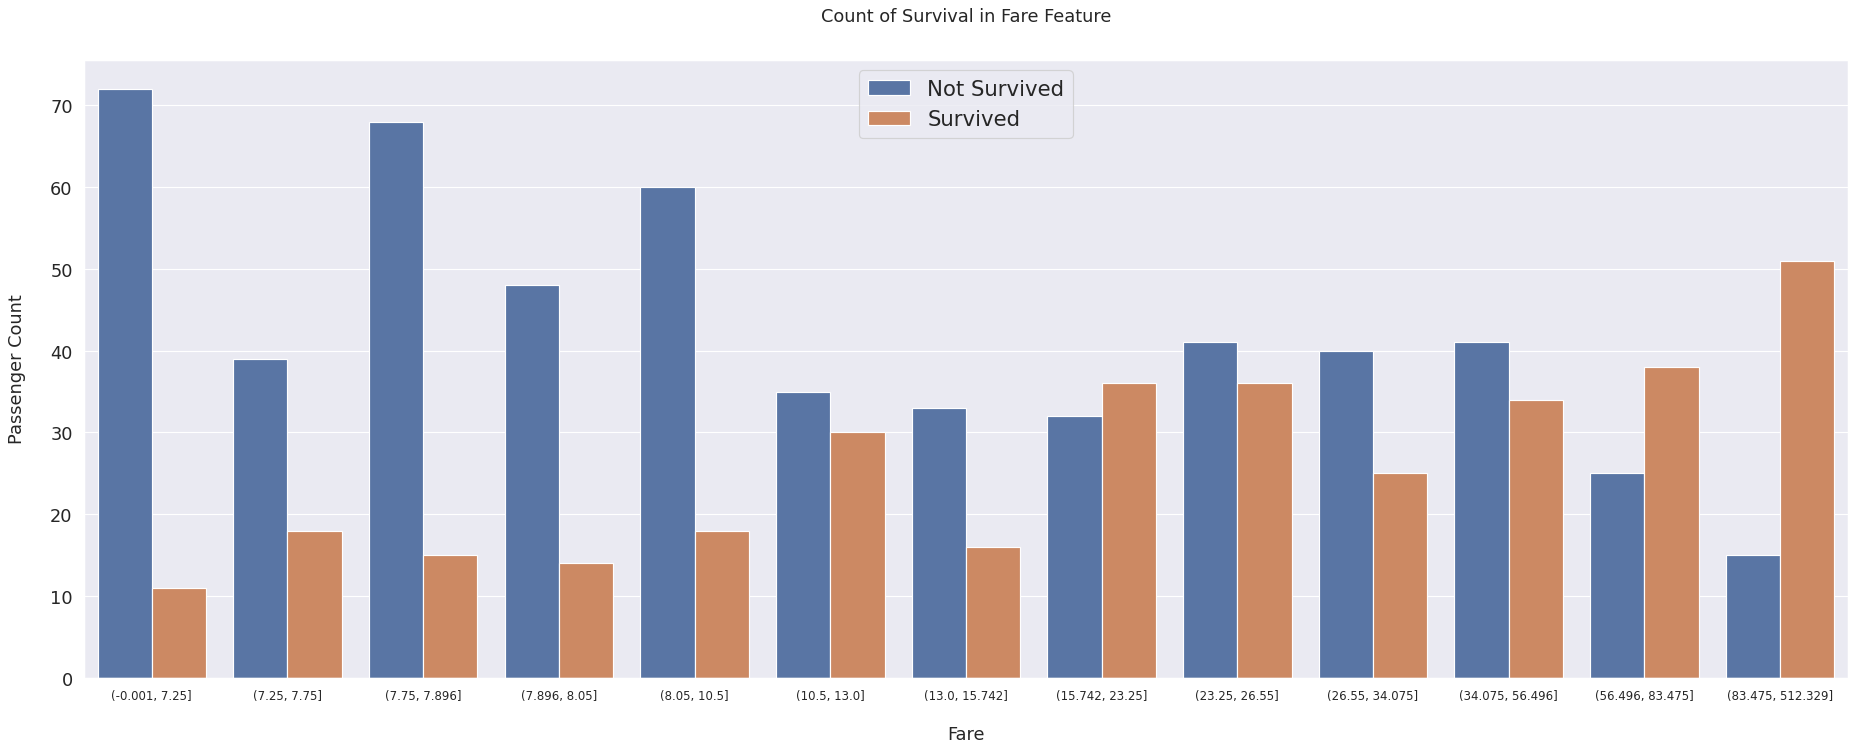

In [132]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper center', prop={'size': 18})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)
plt.tight_layout()
plt.show()

Dapat dilihat bahwa semakin mahal harga tiketnya, semakin besar kemungkinan orang itu selamat, dimulai dari harga 56 ke atas.

Tetapi banyak orang yang selamat dimulai dari 10.5 sudah cukup meningkat, kecuali kejadian yang terjadi pada kelompok pemegang tiket berharga 13-15.742.

##Feature Engineering

### Family_Size & Family_Size_Grouped
Fitur pertama yang kita buat adalah Family_Size, sesuai namanya ini adalah gabungan dari Parent, Children, Sibling, dan Spouse. Lalu kita tambahkan 1 dengan asumsi menghitung diri orang itu juga

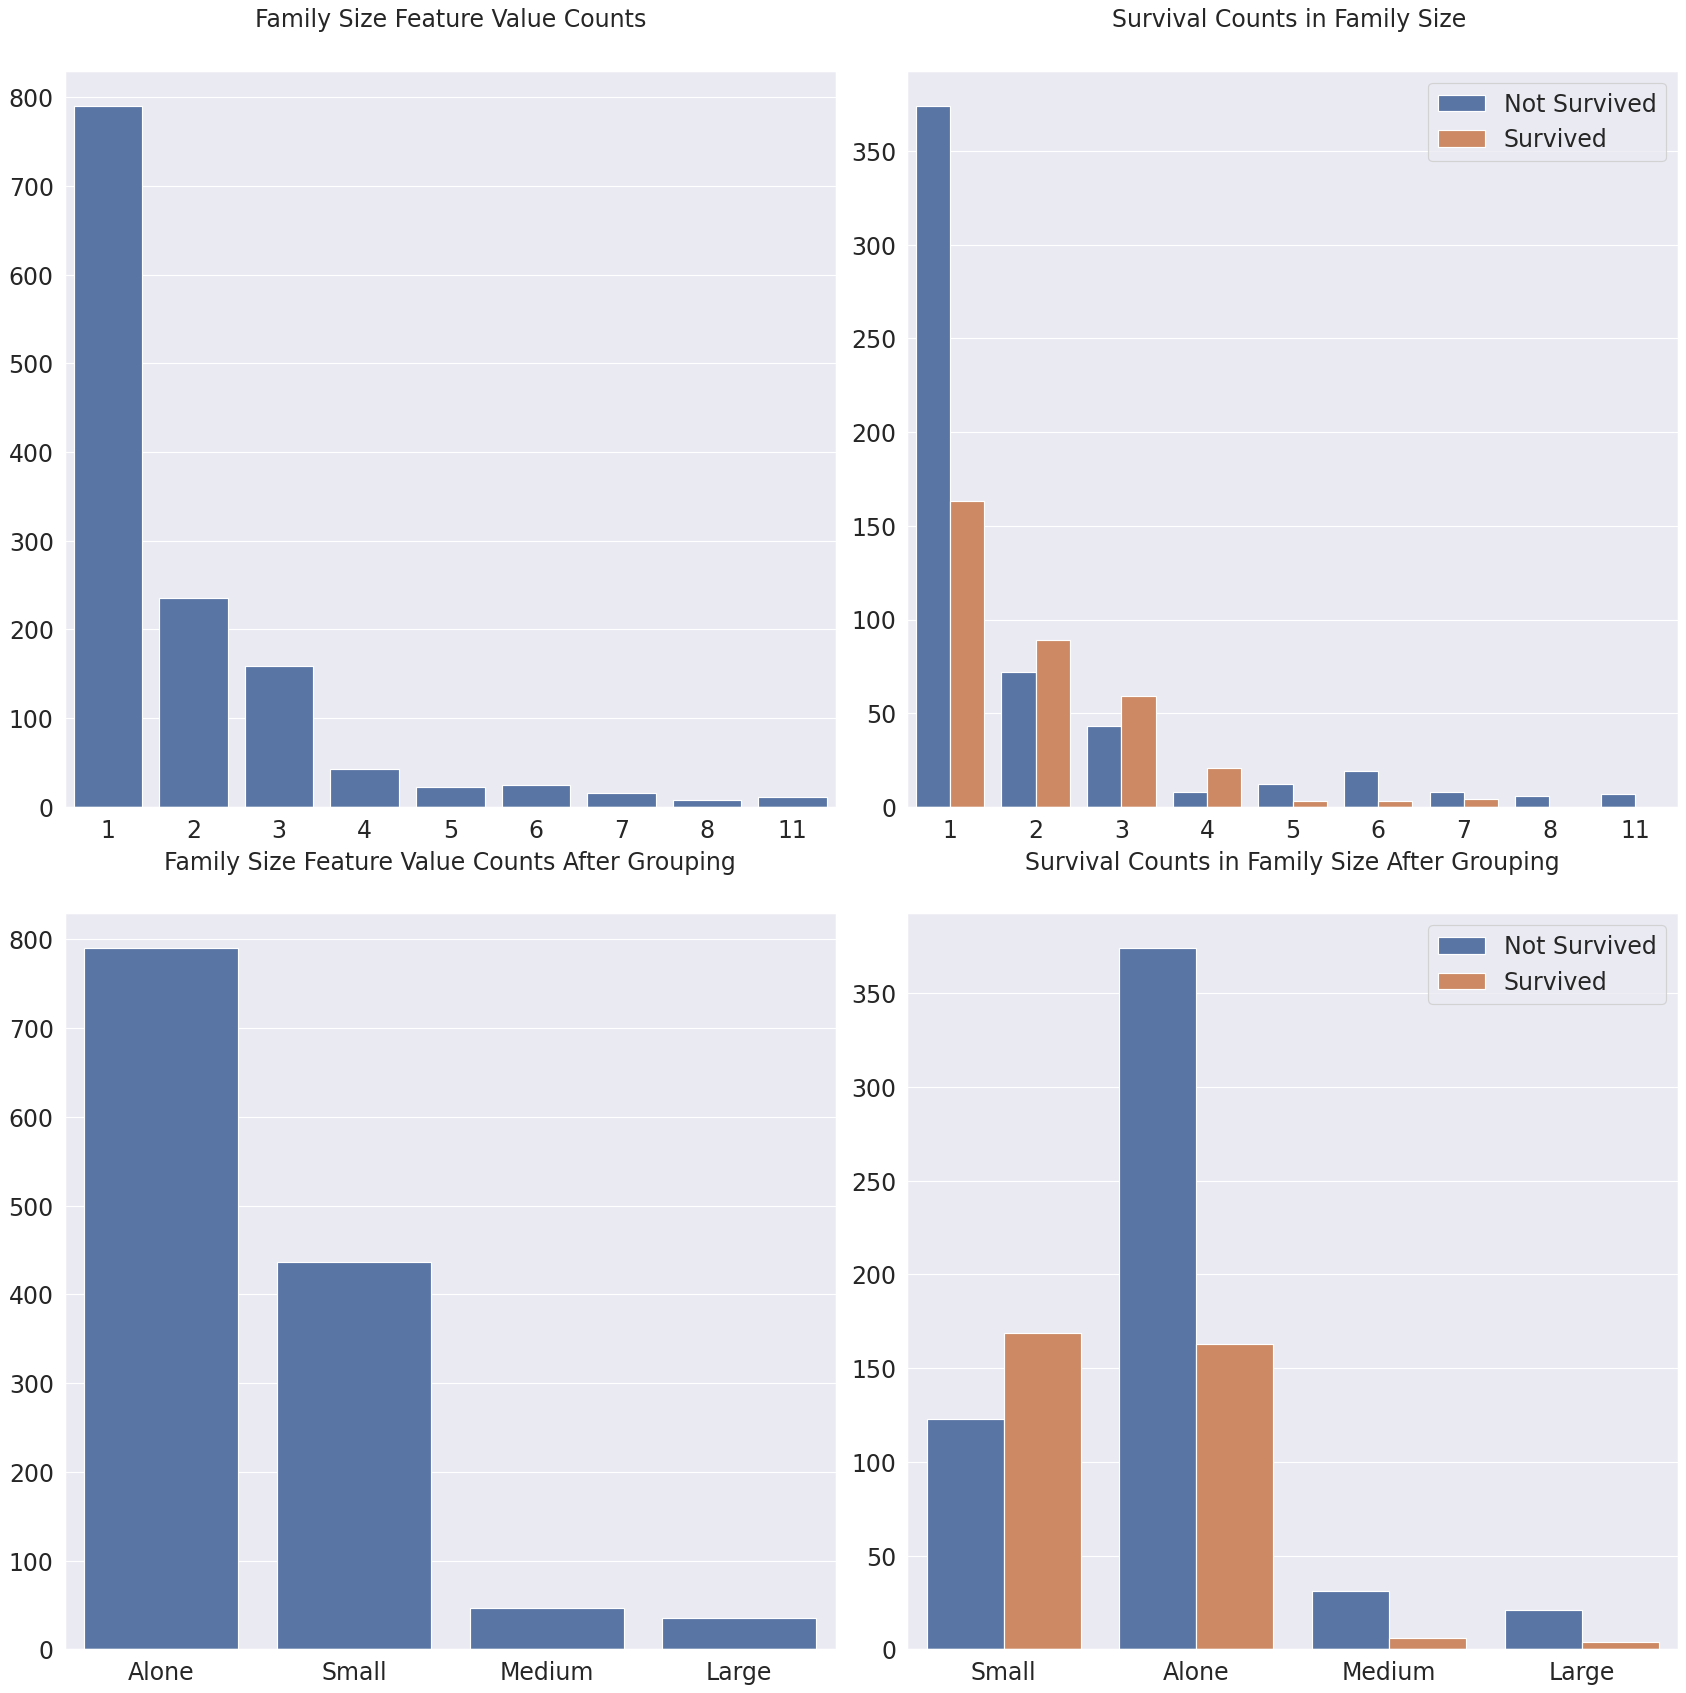

In [133]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=20, y=1.05)
axs[0][1].set_title('Survival Counts in Family Size ', size=20, y=1.05)

family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')
plt.tight_layout()
plt.show()

Pada plot menjelaskan bahwa orang dengan Family_Size 2,3,4 mempunyai kemungkinan selamat lebih besar, selebihnya kemungkinannya menurun dan orang yang pergi dengan Family_Size_Grouped Small lebih terlihat mempunyai tingkat keselamatan lebih besar.

###Ticket_Frequency

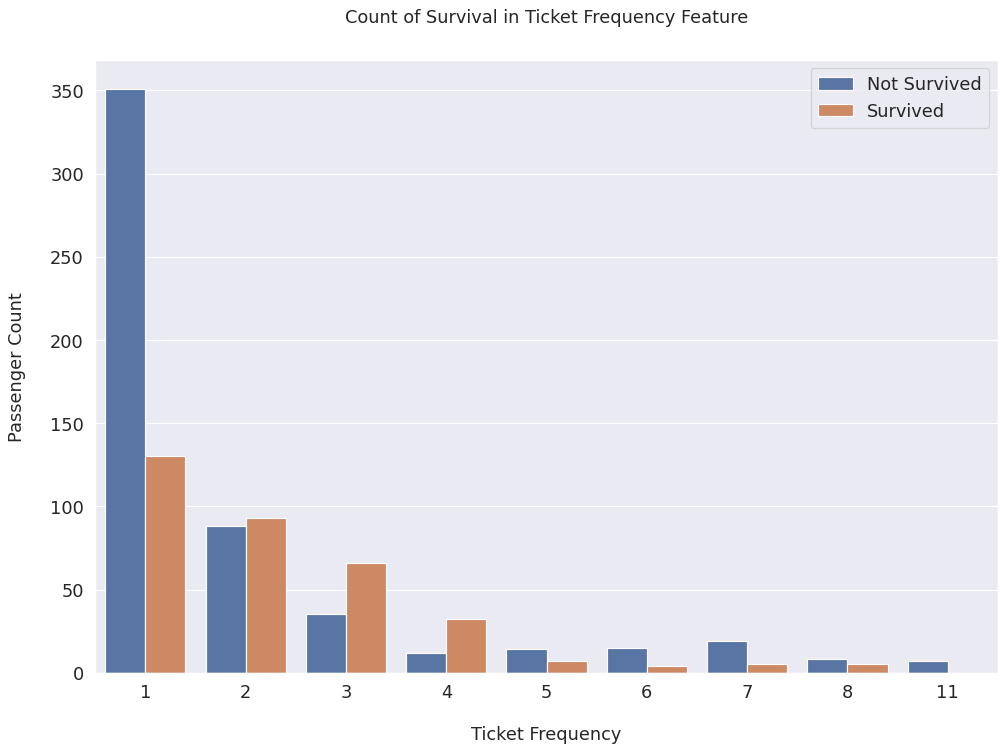

In [134]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')
fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)
plt.tight_layout()
plt.show()

Kenapa feature ini berbeda dari Family_Size_Grouped? Karena bisa jadi ada pembantu, teman yang menggunakan tiket yang sama tetapi tidak terhitung sebagai keluarga.

### Title & Is_married
dari nama orang yang ada di dataset ini, semuanya mempunyai pola yang sama, yaitu: [Nama_belakang], [Jabatan]. [Nama_depan]
sehingga kita bisa mengambil jabatannya saja

In [135]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
print(df_all['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


Kita bisa membuat fitur baru lagi yaitu ‘Is_Married’

Fitur ini adalah jika seseorang mempunyai jabatan ‘Mrs’ , berarti dia sudah menikah.

In [136]:
df_all['Is_Married'] = 0
# df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1
df_all.loc[df_all['Title'] == 'Mrs', 'Is_Married'] = 1


print(df_all['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


Terdapat banyak variasi jabatan (title) dalam data, namun sebagian besar memiliki makna atau peran sosial yang mirip. Oleh karena itu, untuk menyederhanakan analisis dan mengurangi kompleksitas fitur, beberapa jabatan digabungkan ke dalam kelompok yang lebih umum.

- Jabatan seperti ['Miss', 'Mrs', 'Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'] dikategorikan menjadi 'Miss/Mrs/Ms' karena semuanya merujuk pada gelar perempuan, baik yang sudah menikah maupun belum.

- Sementara jabatan seperti ['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'] dikelompokkan menjadi 'Dr/Military/Noble/Clergy', karena berhubungan dengan status profesional, militer, kebangsawanan, atau keagamaan.

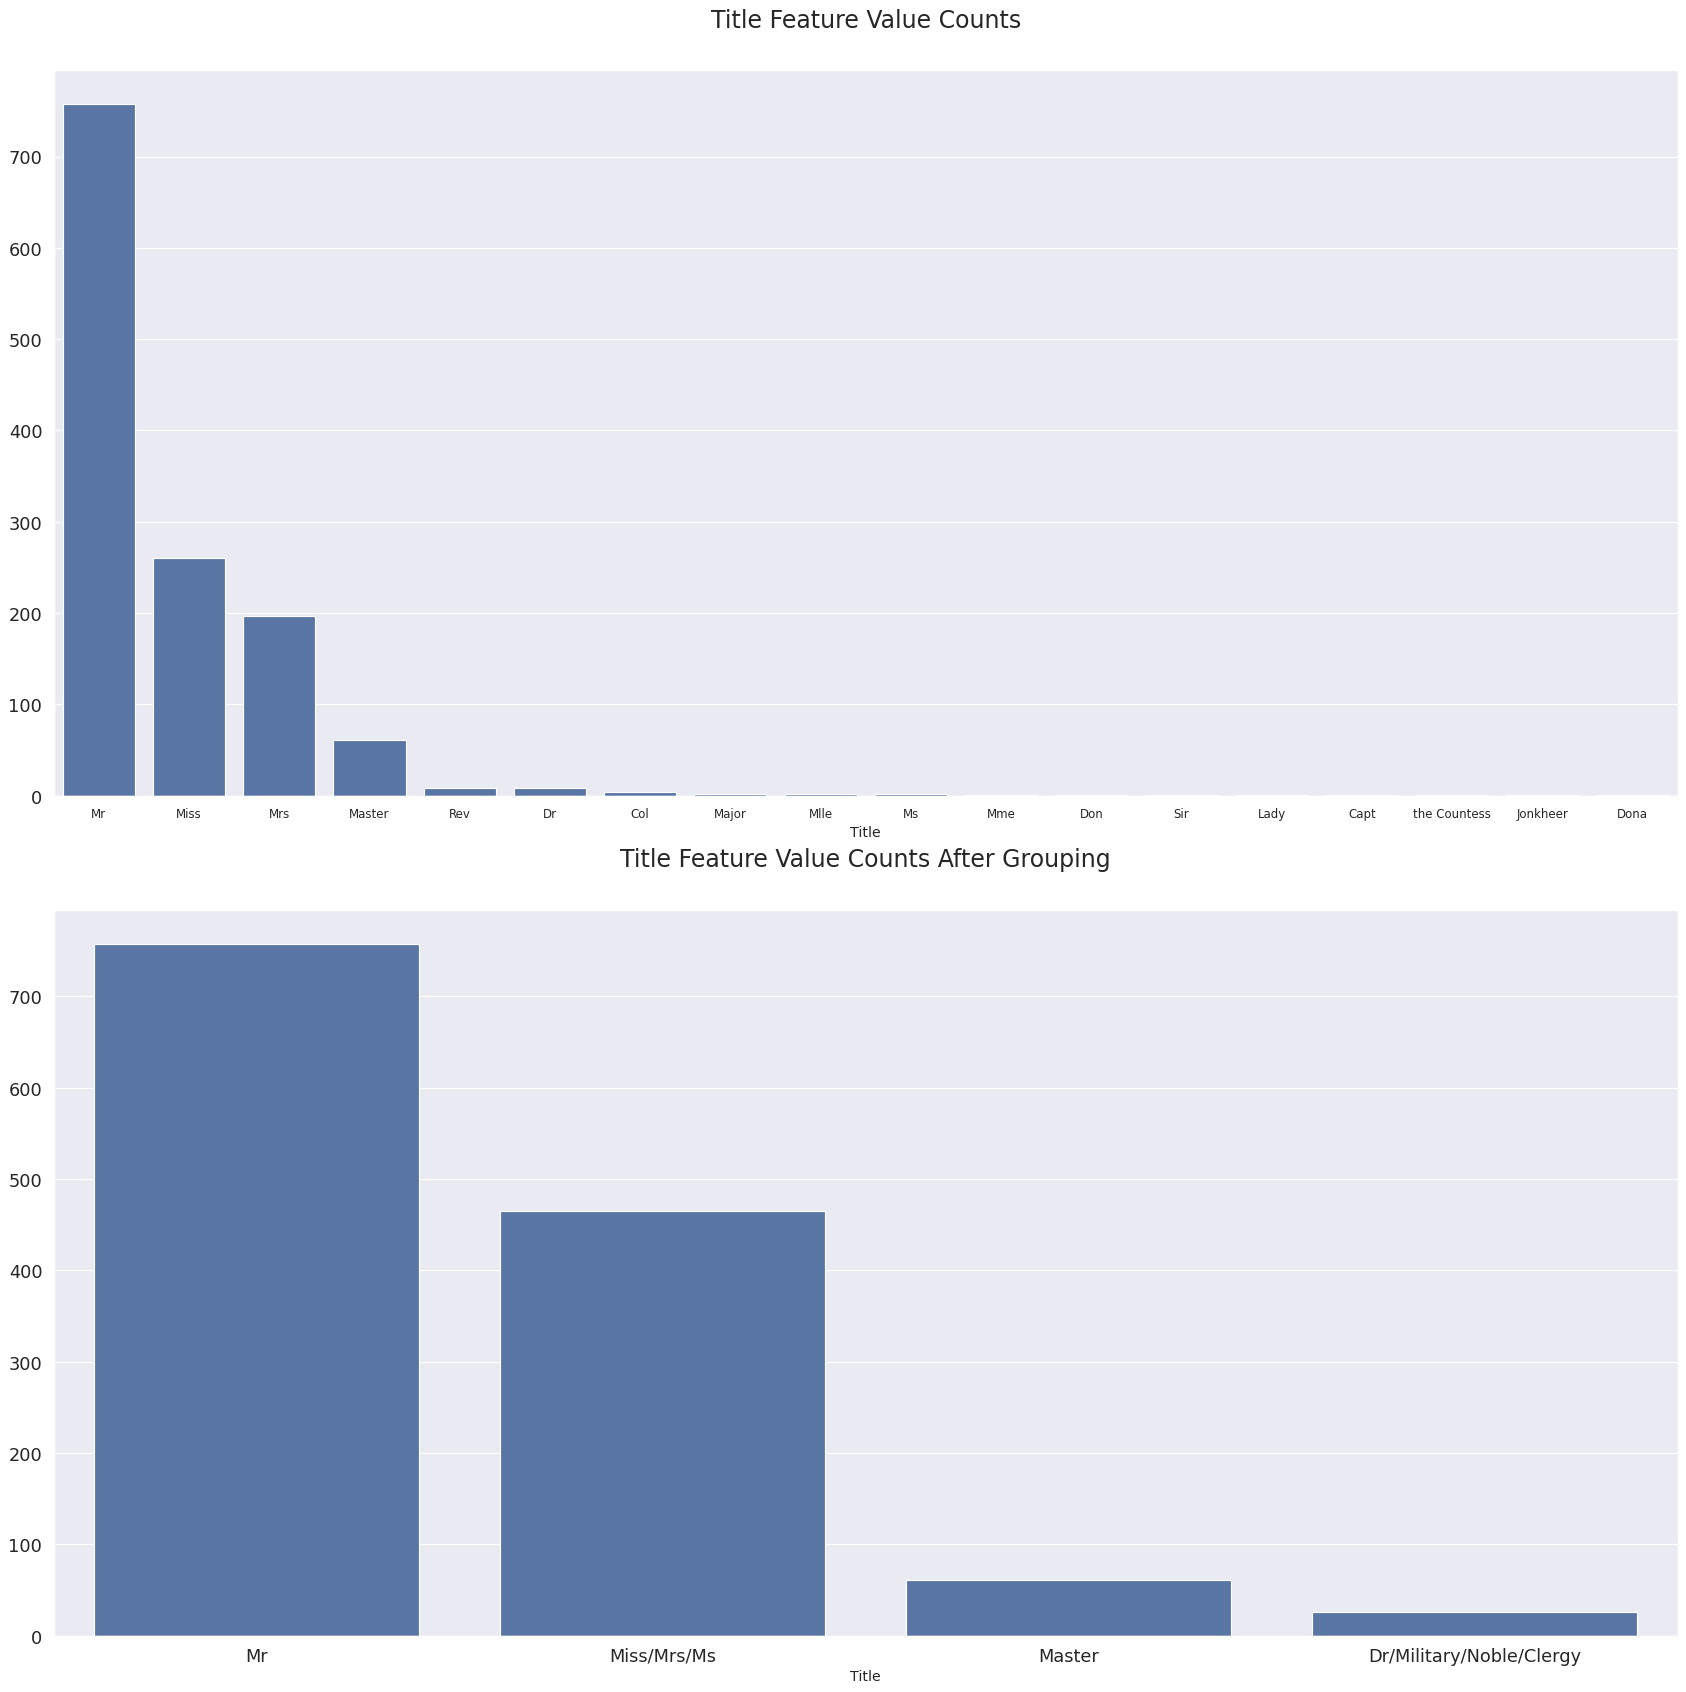

In [137]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])


axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):
  axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.tight_layout()
plt.show()

###Final Check

In [138]:
df_all.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title,Is_Married
0,22.0,NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1,Mr,0
1,38.0,C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2,Miss/Mrs/Ms,1
2,26.0,NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone,1,Miss/Mrs/Ms,0
3,35.0,C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small,2,Miss/Mrs/Ms,1
4,35.0,NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone,1,Mr,0


#Modelling dengan hasil Feature Engineering

membagi kembali dataset kita menjadi train dan test

In [139]:
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

###Encoding

In [152]:
non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped', 'Fare']

for df in dfs:
    for feature in non_numeric_features:
        df.loc[:,feature] = LabelEncoder().fit_transform(df[feature])
        # df[feature] = LabelEncoder().fit_transform(df[feature])

Perintah kedua adalah LabelEncoder untuk data” yang bersifat non-numeric, tujuannya adalah melakukan encoding [0-n] untuk data kategorikal. Contohnya Sex, akan dirubah menjadi 0 dan 1, laki-laki dan perempuan.

In [141]:
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

Perintah ketiga bertujuan untuk mengubah feature kategori menjadi one hot, dengan OneHotEncoder. Akan menghasilkan beberapa kolom tergantung banyaknya kategori.

In [142]:
df_train = pd.concat([df_train, *encoded_features[:5]], axis=1)
df_test = pd.concat([df_test, *encoded_features[5:]], axis=1)

Fitur-fitur kategorikal yang telah dikonversi ke dalam bentuk numerik kemudian digabungkan kembali ke dalam dataset pelatihan dan pengujian masing-masing. Proses ini dilakukan agar seluruh fitur yang dibutuhkan untuk pelatihan model tersedia dalam satu kesatuan data yang utuh dan siap digunakan untuk pemodelan.

###Drop kolom
Kita akan menghapus kolom-kolom yang tidak lagi dibutuhkan, baik karena tidak relevan untuk analisis maupun karena sudah direpresentasikan dalam bentuk lain melalui proses encoding sebelumnya.


In [143]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived', 'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title']

df_all.drop(columns=drop_cols, inplace=True)

In [144]:
df_all.head()

,Age,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4,Fare,Is_Married,...,Pclass_2,Pclass_3,Sex_1,Sex_2,SibSp,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,22.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,...,0.0,1.0,0.0,1.0,1,1,0.0,0.0,0.0,1.0
1,38.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,11,1,...,0.0,0.0,1.0,0.0,1,2,0.0,0.0,1.0,0.0
2,26.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,0,...,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,0.0
3,35.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10,1,...,0.0,0.0,1.0,0.0,1,2,0.0,0.0,1.0,0.0
4,35.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3,0,...,0.0,1.0,0.0,1.0,0,1,0.0,0.0,0.0,1.0


###Split Data

In [145]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values # to_numpy lebih disarankan dari pada .values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 22)
y_train shape: (891,)
X_test shape: (418, 22)


### Training Model


In [146]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion='gini',
                                       n_estimators=1100,
                                       max_depth=5,
                                       min_samples_split=4,
                                       min_samples_leaf=5,
                                       max_features='sqrt',
                                       oob_score=True,
                                       random_state=50)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=1100, oob_score=True, random_state=50)

In [147]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.87640449 0.76404494 0.87640449 0.84269663 0.80898876
 0.82022472 0.78651685 0.87640449 0.85393258]
Mean: 0.8338951310861423
Standard Deviation: 0.03719055862675359


Hasil akurasi nya dengan menggunakan feature dari feature engineering adalah sekitar 0.832

#Modelling tanpa hasil Feature Engineering
Pada tahap ini, proses pemodelan akan dilakukan ulang tanpa menyertakan fitur-fitur tambahan yang sebelumnya telah dikonstruksi.

In [148]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title',
             'Family_Size_Grouped_1', 'Family_Size_Grouped_2', 'Family_Size_Grouped_3', 'Family_Size_Grouped_4',
             'Ticket_Frequency', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Is_Married']

df_all.drop(columns=drop_cols, inplace=True)

print(df_all.head())

    Age  Embarked_1  Embarked_2  Embarked_3  Fare  Parch  Pclass_1  Pclass_2  \
0  22.0         0.0         0.0         1.0     0      0       0.0       0.0   
1  38.0         1.0         0.0         0.0    11      0       1.0       0.0   
2  26.0         0.0         0.0         1.0     3      0       0.0       0.0   
3  35.0         0.0         0.0         1.0    10      0       1.0       0.0   
4  35.0         0.0         0.0         1.0     3      0       0.0       0.0   

   Pclass_3  Sex_1  Sex_2  SibSp  
0       1.0    0.0    1.0      1  
1       0.0    1.0    0.0      1  
2       1.0    1.0    0.0      0  
3       0.0    1.0    0.0      1  
4       1.0    0.0    1.0      0  


In [149]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (891, 12)
y_train shape: (891,)
X_test shape: (418, 12)


In [150]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion='gini',
                                       n_estimators=1100,
                                       max_depth=5,
                                       min_samples_split=4,
                                       min_samples_leaf=5,
                                       max_features='sqrt',
                                       oob_score=True,
                                       random_state=50)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=1100, oob_score=True, random_state=50)

In [151]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78888889 0.84269663 0.76404494 0.87640449 0.85393258 0.80898876
 0.79775281 0.7752809  0.86516854 0.80898876]
Mean: 0.818214731585518
Standard Deviation: 0.03700330937285851


Akurasi yang diperoleh dari pemodelan tanpa feature engineering adalah sebesar 0.81258, atau lebih rendah sekitar 2% dibandingkan dengan model yang menggunakan feature engineering.

Hal ini menunjukkan bahwa feature engineering mampu memberikan kontribusi signifikan dalam meningkatkan performa model.

Fitur-fitur turunan yang dihasilkan dari proses ini terbukti membantu model memahami data dengan lebih baik. Dengan kata lain, feature engineering merupakan salah satu tahapan krusial dalam membangun model machine learning yang akurat dan andal.